In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

df1 = pd.read_csv('data/2020_US_Region_Mobility_Report.csv')
df2 = pd.read_csv('data/2021_US_Region_Mobility_Report.csv')
df1

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812060,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-24,NaN,NaN,NaN,NaN,-56.0,NaN
812061,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-28,NaN,NaN,NaN,NaN,-40.0,NaN
812062,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-29,NaN,NaN,NaN,NaN,-43.0,NaN
812063,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,ChIJd4Rqhed3YocR7ubT5-HgoJg,2020-12-30,NaN,NaN,NaN,NaN,-40.0,NaN


In [2]:
places_df = pd.concat([df1,df2])


In [3]:
columns = ['census_fips_code', 'iso_3166_2_code', 'metro_area', 'place_id', 'country_region', 'country_region_code']
places_df.drop(columns=columns, inplace=True)
places_df.to_csv('data/clean_mobility_data.csv')


In [4]:
places_df['New Date'] = pd.to_datetime(places_df['date'], format='%Y-%m-%d')
places_df

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Date
0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0,2020-02-15
1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0,2020-02-16
2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0,2020-02-17
3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0,2020-02-18
4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0,2020-02-19
...,...,...,...,...,...,...,...,...,...,...
299298,Wyoming,Weston County,2021-04-19,NaN,NaN,NaN,NaN,-26.0,NaN,2021-04-19
299299,Wyoming,Weston County,2021-04-20,NaN,NaN,NaN,NaN,-15.0,NaN,2021-04-20
299300,Wyoming,Weston County,2021-04-21,NaN,NaN,NaN,NaN,-23.0,NaN,2021-04-21
299301,Wyoming,Weston County,2021-04-22,NaN,NaN,NaN,NaN,-14.0,NaN,2021-04-22


In [5]:

# date = pd.to_datetime(raw_cases_df['date'], format = "%Y/%m/%d")
# raw_cases_df['date'] = date


feb_month = places_df['New Date'].map(lambda x: x.month) == 2
feb_df = places_df[feb_month]

mar_month = places_df['New Date'].map(lambda x: x.month) == 3
mar_df = places_df[mar_month]

apr_month = places_df['New Date'].map(lambda x: x.month) == 4
apr_df = places_df[apr_month]

mar_df


,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Date
15,NaN,NaN,2020-03-01,13.0,9.0,18.0,7.0,3.0,-1.0,2020-03-01
16,NaN,NaN,2020-03-02,7.0,6.0,10.0,2.0,3.0,-1.0,2020-03-02
17,NaN,NaN,2020-03-03,11.0,10.0,20.0,3.0,2.0,-1.0,2020-03-03
18,NaN,NaN,2020-03-04,8.0,6.0,17.0,2.0,3.0,-1.0,2020-03-04
19,NaN,NaN,2020-03-05,8.0,7.0,21.0,2.0,3.0,-1.0,2020-03-05
...,...,...,...,...,...,...,...,...,...,...
299281,Wyoming,Weston County,2021-03-25,NaN,NaN,NaN,NaN,-8.0,NaN,2021-03-25
299282,Wyoming,Weston County,2021-03-26,NaN,NaN,NaN,NaN,-3.0,NaN,2021-03-26
299283,Wyoming,Weston County,2021-03-29,NaN,NaN,NaN,NaN,-17.0,NaN,2021-03-29
299284,Wyoming,Weston County,2021-03-30,NaN,NaN,NaN,NaN,-15.0,NaN,2021-03-30


In [6]:
feb_df.columns

Index(['sub_region_1', 'sub_region_2', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'New Date'],
      dtype='object')

In [7]:
feb2020_df = feb_df[feb_df['New Date'].map(lambda x: x.year) == 2020]
feb2021_df = feb_df[feb_df['New Date'].map(lambda x: x.year) == 2021]

mar2020_df = mar_df[mar_df['New Date'].map(lambda x: x.year) == 2020]
mar2021_df = mar_df[mar_df['New Date'].map(lambda x: x.year) == 2021]

apr2020_df = apr_df[apr_df['New Date'].map(lambda x: x.year) == 2020]
apr2021_df = apr_df[apr_df['New Date'].map(lambda x: x.year) == 2021]

In [8]:
feb2020_df

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Date
0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0,2020-02-15
1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0,2020-02-16
2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0,2020-02-17
3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0,2020-02-18
4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0,2020-02-19
...,...,...,...,...,...,...,...,...,...,...
811860,Wyoming,Weston County,2020-02-24,NaN,NaN,NaN,NaN,-4.0,NaN,2020-02-24
811861,Wyoming,Weston County,2020-02-25,NaN,-9.0,NaN,NaN,2.0,NaN,2020-02-25
811862,Wyoming,Weston County,2020-02-26,NaN,-4.0,NaN,NaN,-6.0,NaN,2020-02-26
811863,Wyoming,Weston County,2020-02-27,NaN,NaN,NaN,NaN,0.0,NaN,2020-02-27


In [9]:
feb2020_means = feb2020_df[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].mean().values
feb2021_means = feb2021_df[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].mean().values

mar2020_means = mar2020_df[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].mean().values
mar2021_means = mar2021_df[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].mean().values

apr2020_means = apr2020_df[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].mean().values
apr2021_means = apr2021_df[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].mean().values



In [10]:
feb2021_means

array([-17.12114925,  -7.96215919, -16.77044112, -20.95809931,
       -21.91011018,   9.19985659])

In [11]:
feb2020_means

array([ 6.14519567,  2.10323314, 14.45450393,  4.25353121, -0.08616056,
        0.23281266])

In [12]:
rr_means=[]
gp_means=[]
parks_means=[]
trans_means=[]
work_means=[]
res_means=[]

In [13]:
feb_comparison=list(zip(feb2020_means, feb2021_means))
feb_comparison

[(6.1451956711849585, -17.121149245199128),
 (2.10323314108252, -7.962159194002769),
 (14.454503928375662, -16.770441122185307),
 (4.25353121135195, -20.95809930739809),
 (-0.08616055985737474, -21.910110179474742),
 (0.23281265545716845, 9.199856589060435)]

In [14]:
feb2020_df[['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']].mean().values

array([ 6.14519567,  2.10323314, 14.45450393,  4.25353121, -0.08616056,
        0.23281266])

In [15]:
feb2020_df

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Date
0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0,2020-02-15
1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0,2020-02-16
2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0,2020-02-17
3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0,2020-02-18
4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0,2020-02-19
...,...,...,...,...,...,...,...,...,...,...
811860,Wyoming,Weston County,2020-02-24,NaN,NaN,NaN,NaN,-4.0,NaN,2020-02-24
811861,Wyoming,Weston County,2020-02-25,NaN,-9.0,NaN,NaN,2.0,NaN,2020-02-25
811862,Wyoming,Weston County,2020-02-26,NaN,-4.0,NaN,NaN,-6.0,NaN,2020-02-26
811863,Wyoming,Weston County,2020-02-27,NaN,NaN,NaN,NaN,0.0,NaN,2020-02-27


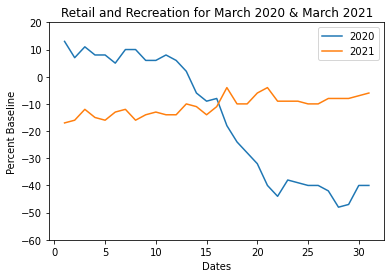

In [25]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 20])

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day

plt.plot(mar2020_df['month'], mar2020_df['retail_and_recreation_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['retail_and_recreation_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Retail and Recreation for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Retail and Recreation for March 2020 & March 2021")



plt.show()

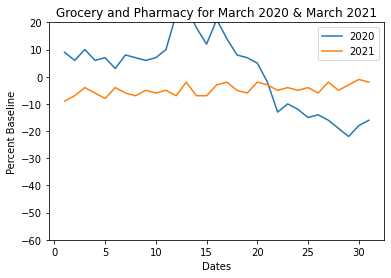

In [26]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

y = np.array([-60, -50, -40, -30, -20, -10, 0, 10, 20])

plt.ylim([-60, 20])

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day
plt.plot(mar2020_df['month'], mar2020_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Grocery and Pharmacy for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Grocery and Pharmacy for March 2020 & March 2021")



plt.show()

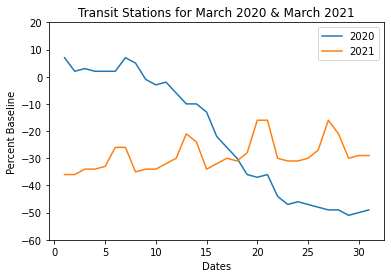

In [27]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 20])

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day
plt.plot(mar2020_df['month'], mar2020_df['transit_stations_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['transit_stations_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Transit Stations for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Transit Stations for March 2020 & March 2021")



plt.show()

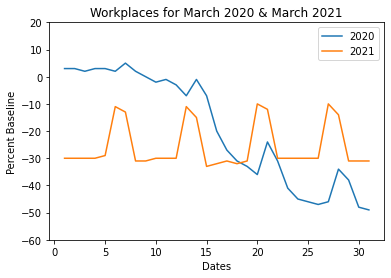

In [28]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 20])

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day
plt.plot(mar2020_df['month'], mar2020_df['workplaces_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['workplaces_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Workplaces for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Workplaces for March 2020 & March 2021")


plt.show()

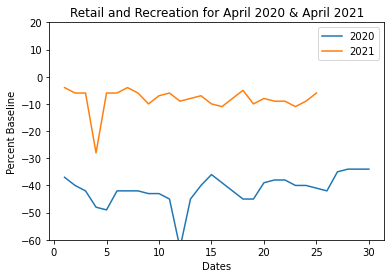

In [29]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 20])

# Data
apr2020_df = apr2020_df[apr2020_df['sub_region_1'].isnull()]
apr2021_df = apr2021_df[apr2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['retail_and_recreation_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['retail_and_recreation_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Retail and Recreation for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Retail and Recreation for April 2020 & April 2021")


plt.show()

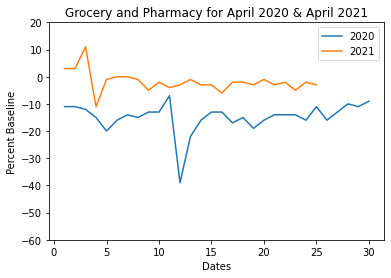

In [30]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 20])

# Data
apr2020_df = apr2020_df[apr2020_df['sub_region_1'].isnull()]
apr2021_df = apr2021_df[apr2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Grocery and Pharmacy for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Grocery and Pharmacy for April 2020 & April 2021")


plt.show()

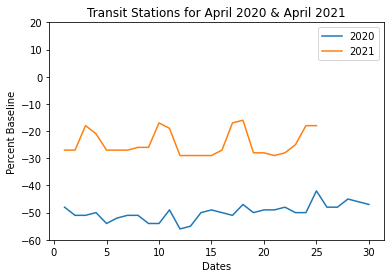

In [31]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 20])

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['transit_stations_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['transit_stations_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Transit Stations for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Transit Stations for April 2020 & April 2021")


plt.show()

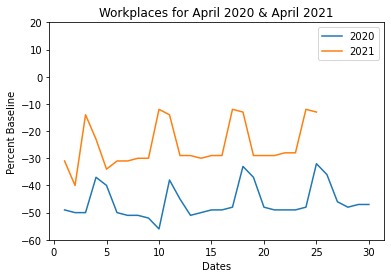

In [32]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 20])

# Data
apr2020_df = apr2020_df[apr2020_df['sub_region_1'].isnull()]
apr2021_df = apr2021_df[apr2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['workplaces_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['workplaces_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Workplaces for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Workplaces for April 2020 & April 2021")



plt.show()

In [24]:
list(feb_comparison[0])

[6.1451956711849585, -17.121149245199128]